In [1]:
import yfinance as yf

In [2]:
df = yf.download('TSLA' , start='2018-01-01'  , end = '2025-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2018-01-02,21.368668,21.474001,20.733334,20.799999,65283000
2018-01-03,21.150000,21.683332,21.036667,21.400000,67822500
2018-01-04,20.974667,21.236668,20.378668,20.858000,149194500
2018-01-05,21.105333,21.149332,20.799999,21.108000,68868000
2018-01-08,22.427334,22.468000,21.033333,21.066668,147891000
...,...,...,...,...,...
2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800
2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400


In [4]:
import matplotlib.pyplot as mlt
import seaborn as sns
from scipy.stats import shapiro

<Axes: ylabel='Count'>

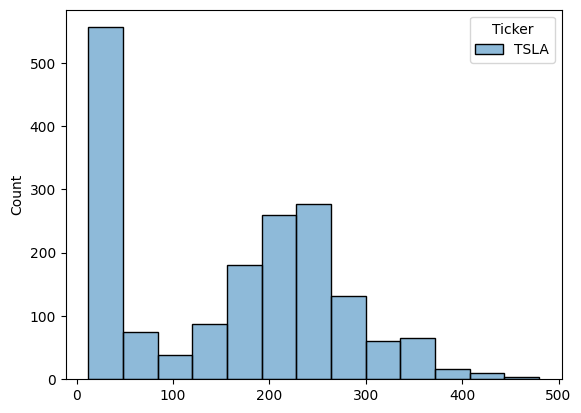

In [5]:
sns.histplot(df['Close'])

<Axes: ylabel='Count'>

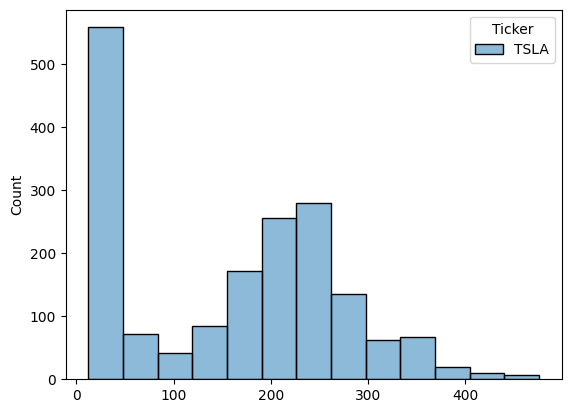

In [6]:
sns.histplot(df['Open'])

<Axes: ylabel='Count'>

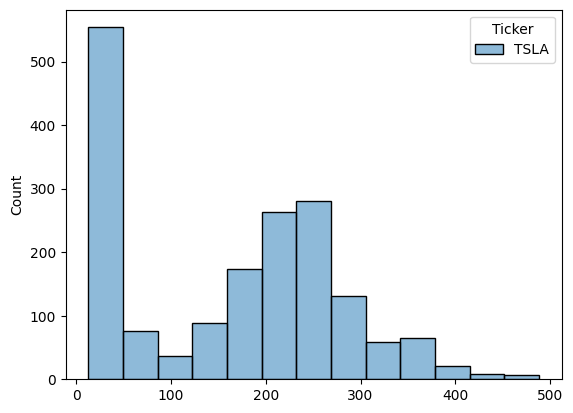

In [7]:
sns.histplot(df['High'])

<Axes: ylabel='Count'>

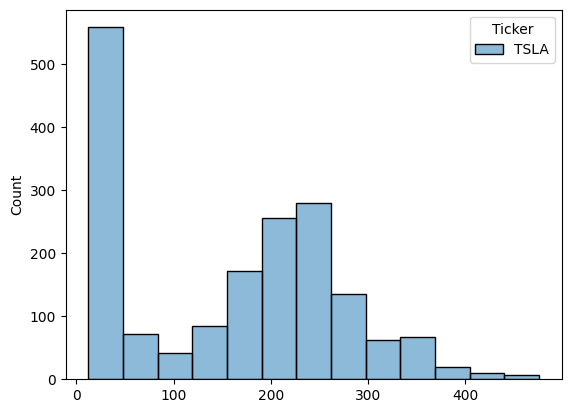

In [8]:
sns.histplot(df['Open'])

<Axes: ylabel='Count'>

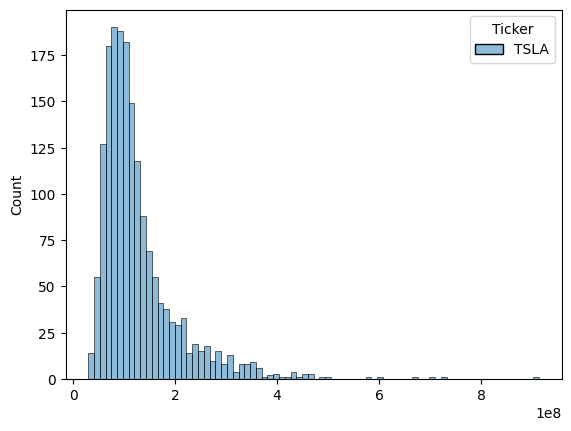

In [9]:
sns.histplot(df['Volume'])

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score


In [25]:
X = df[['Open','High','Low','Volume']]
y = df['Close']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

8.489958278111159
0.9977023529812561


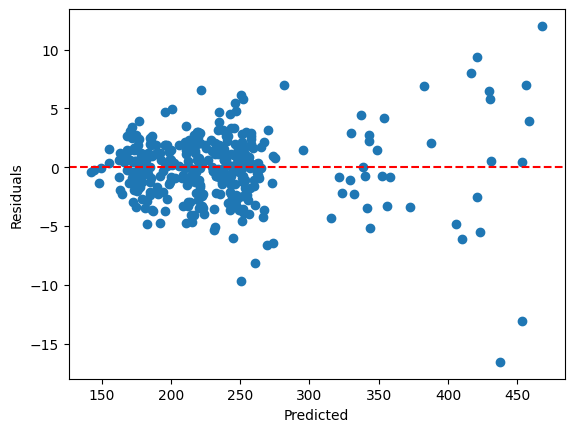

In [31]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()
